In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import time
plt.style.use('classic')
%matplotlib inline
sns.set()

In [2]:
# Import dataset
data = pd.read_csv("loan_final313.csv")
display(data.head())
display(data.shape)

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


(887379, 30)

In [3]:
# Select 9 main features
data0 = data.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18]]
display(data0.head())
display(data0.shape)

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


(887379, 9)

In [4]:
# Data cleansing: drop 3 owenership types with few records
data0 = data0[data0.home_ownership_cat < 4]
display(data0.shape)

(887144, 9)

In [5]:
# Correlation matrix
cor_mat0 = np.corrcoef(data0.T)
display(cor_mat0)

array([[ 1.        ,  0.06338875, -0.07280079,  0.33269502,  0.05834766,
        -0.03410024,  0.15503777,  0.00474794, -0.06314641],
       [ 0.06338875,  1.        ,  0.00892193,  0.10384131,  0.06748536,
        -0.01577214,  0.20466392,  0.01924786,  0.00769061],
       [-0.07280079,  0.00892193,  1.        ,  0.14496797,  0.42808118,
         0.17547645, -0.06439472,  0.15816944,  0.80224345],
       [ 0.33269502,  0.10384131,  0.14496797,  1.        ,  0.41168629,
         0.00355374,  0.19664019, -0.03702122,  0.11283019],
       [ 0.05834766,  0.06748536,  0.42808118,  0.41168629,  1.        ,
         0.03965886,  0.11015103,  0.02927459,  0.35131102],
       [-0.03410024, -0.01577214,  0.17547645,  0.00355374,  0.03965886,
         1.        , -0.03754934,  0.03122915,  0.140547  ],
       [ 0.15503777,  0.20466392, -0.06439472,  0.19664019,  0.11015103,
        -0.03754934,  1.        ,  0.02271482, -0.05031722],
       [ 0.00474794,  0.01924786,  0.15816944, -0.03702122,  0

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


168.4625876 seconds


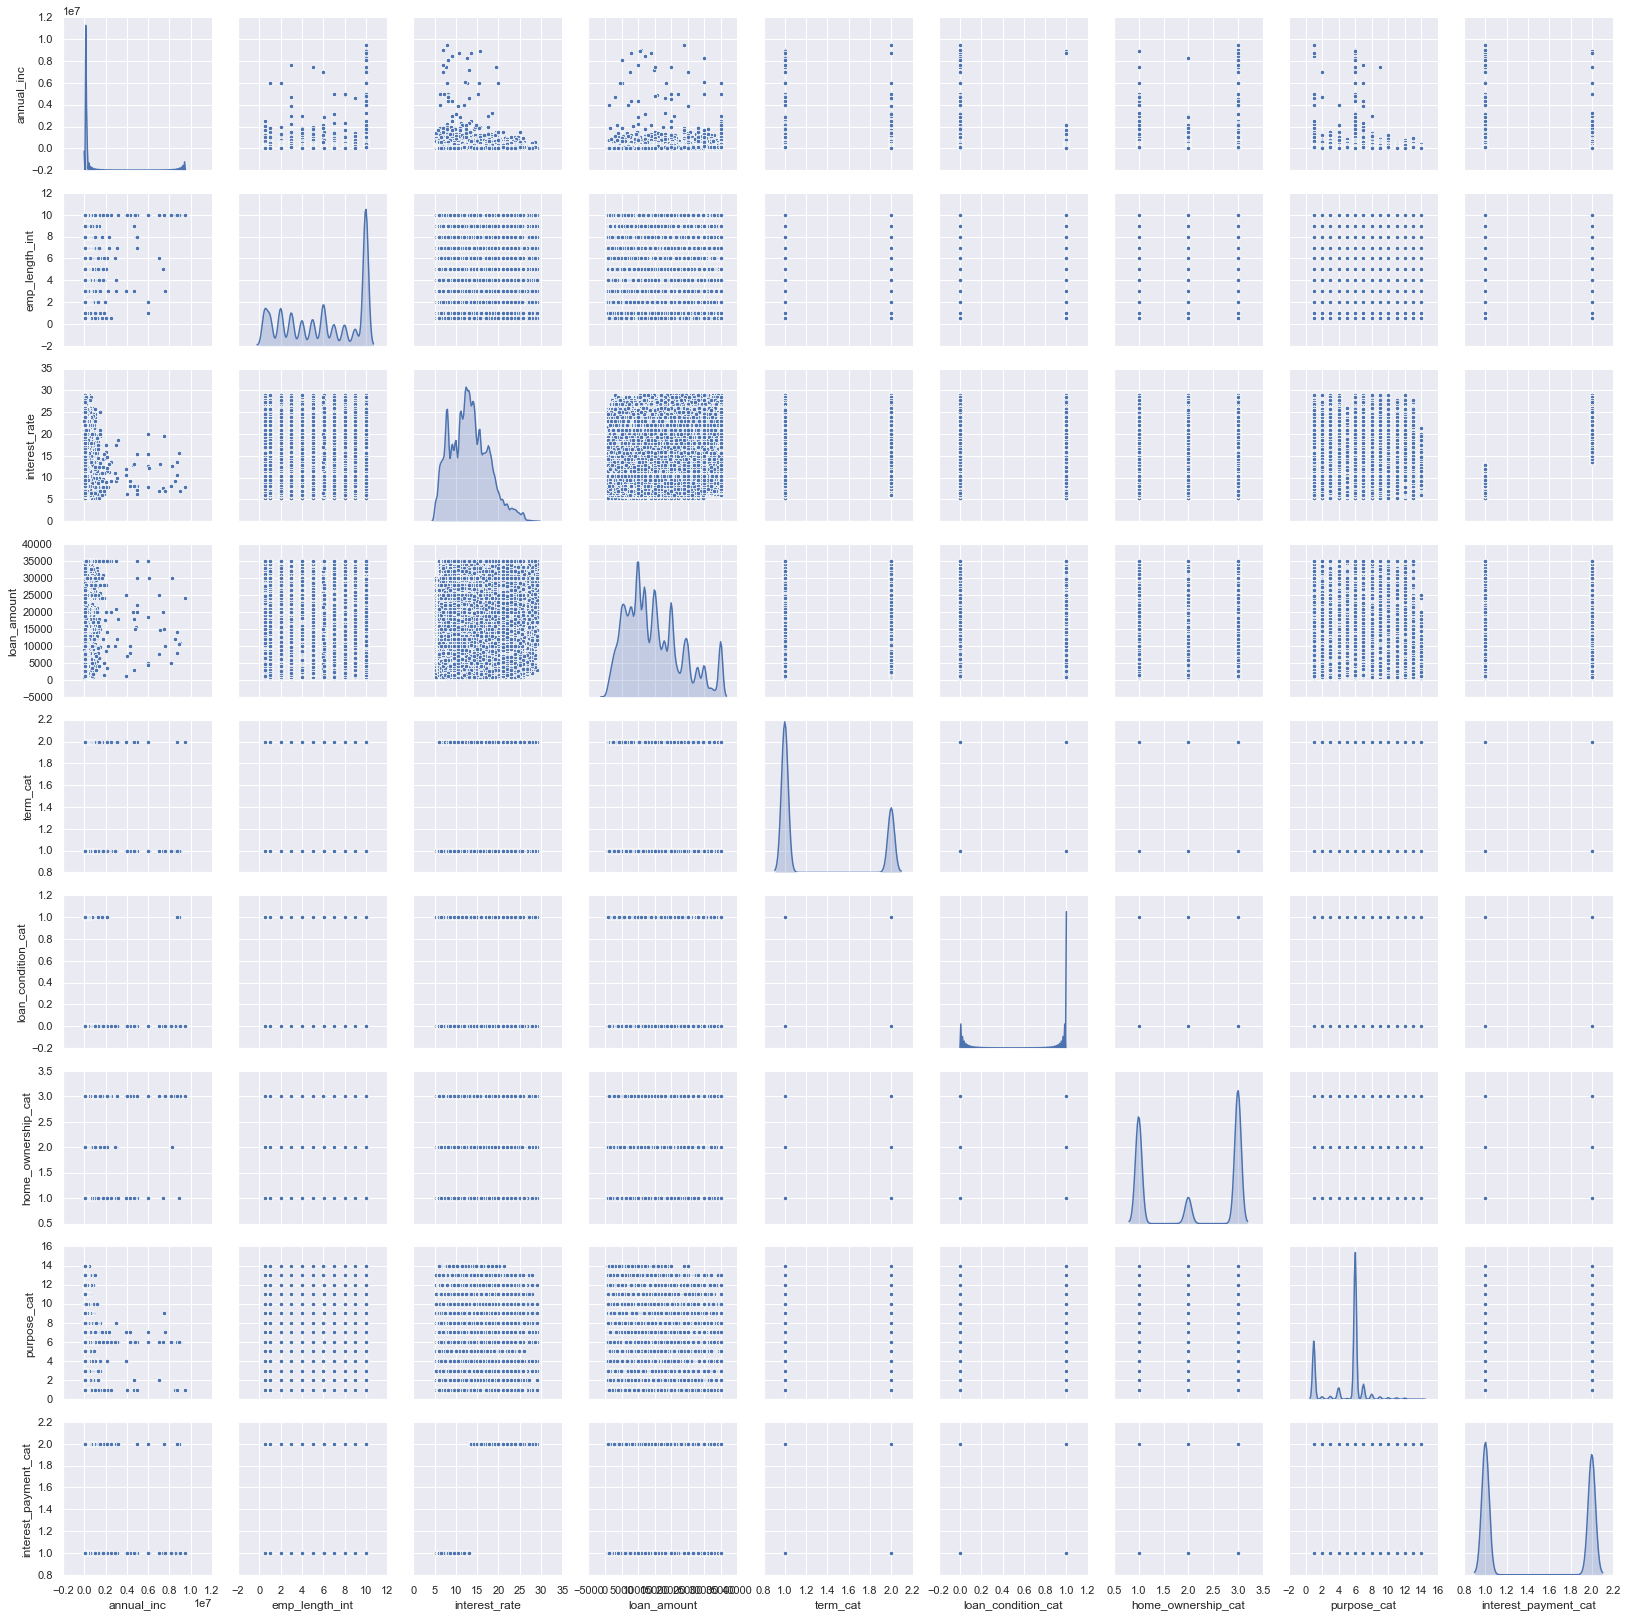

In [6]:
# Scatterplot
start_time = time.perf_counter()
g1 = sns.pairplot(data0, diag_kind='kde')
end_time = time.perf_counter()
g1.savefig('nine_fea_cor.png')
print (end_time - start_time, "seconds")

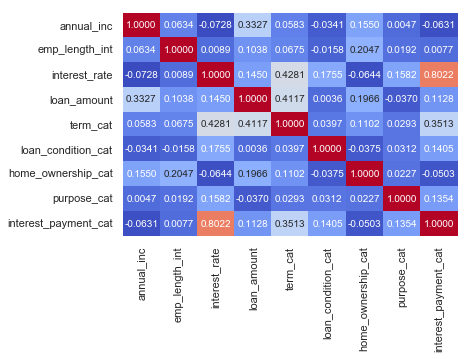

In [7]:
# Heatmap (correlation)
fig0, ax0 = plt.subplots()
sns.heatmap(data0.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax0)
ax0.set_yticklabels(ax0.get_yticklabels(), rotation="horizontal")
plt.savefig('cor_heat.png', bbox_inches='tight', pad_inches=0.0)